In [1]:
import shapely
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [3]:
zipcodes.head()

zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

In [4]:
public_parks = gpd.read_file('../data/Public Metro Parks Boundaries (GIS).geojson')

In [5]:
public_parks = public_parks.assign(public = 'yes')
public_parks = public_parks.drop(labels=['common_nam', 'status'], axis=1)
public_parks.head()

acres                  name year_estab                  address  \
0     69.86    Harpeth River Park       1988      7820 Coley Davis Rd   
1      9.88    Harpeth Knoll Park       1972  708 Goodpasture Terrace   
2     17.14         Bellevue Park       1982     656 Colice Jeanne Rd   
3    809.59       Bells Bend Park       2007    4187 Old Hickory Blvd   
4  2168.792  Alvin G. Beaman Park       1996   5911 Old Hickory Blvd.   

            lon          lat  \
0   -86.9592214  36.07738249   
1  -86.93815537  36.05942777   
2  -86.93354496  36.07159731   
3  -86.92646294  36.15016925   
4  -86.91984207  36.26075833   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   
2  Bellevue Park, known as Red Caboose Park, is p...   
3  Located in western Davidson County, this park ...   
4  Beaman Park provides education and awareness p...   

                                            geometry public  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...    yes  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...    yes  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...    yes  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...    yes  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...    yes

In [6]:
bank_parks = gpd.read_file('../data/Bank Parks - Land Bank Acquisitions Outlines (GIS).geojson')

In [7]:
bank_parks = bank_parks[['city', 'zipcode', 'acres', 'name', 'shape_area', 'shape_leng', 'address', 'historic', 'ada', 'geometry']]
bank_parks = bank_parks.assign(public = 'no')
bank_parks.head()

city zipcode          acres             name     shape_area  \
0    Antioch   37013            622  Mill Ridge Park   27005433.936   
1    Antioch   37013          23.94             None  1038220.47526   
2    Madison   37115          10.25             None   436585.60938   
3  Nashville   37204  1.41582132469             None  61672.9302239   
4  Nashville   37221           0.48             None  22116.8493151   

      shape_leng             address historic   ada  \
0  49208.6104992    1269 OLD HICKORY      Yes  None   
1  4707.18920818      Crossings Blvd     None  None   
2  3198.94335297     512 NAWAKWA TRL       No    No   
3  1376.26998191     2922 MCNAIRY LN     None  None   
4   780.91605676  1016 BEECH BEND DR     None  None   

                                            geometry public  
0  MULTIPOLYGON (((-86.61072 36.01596, -86.61072 ...     no  
1  MULTIPOLYGON (((-86.64436 36.04331, -86.64399 ...     no  
2  MULTIPOLYGON (((-86.66357 36.24040, -86.66203 ...     no  
3  MULTIPOLYGON (((-86.77956 36.11125, -86.77960 ...     no  
4  MULTIPOLYGON (((-86.94581 36.05387, -86.94600 ...     no

In [8]:
public_hydration = gpd.read_file('../data/Public Water Fountains and Hydration Systems (GIS).geojson')

In [9]:
public_hydration.head()

name             location dog  \
0                          Beaman Water Fountain                 None   Y   
1             Edwin Nature Center Water Fountain  Restrooms Breezeway   N   
2  Percy Warner Belle Meade Gates Water Fountain    Belle Meade Gates   Y   
3                       West Park Water Fountain            Ballfield   N   
4                   Richland Park Water Fountain           Playground   N   

  objectid          lon ada cnt           lat                   feat_type  \
0    45921  36.26250456   Y   1  -86.89425346  Fountain/Bottle filler/ADA   
1    45937  36.06089915   Y   1  -86.90622747           Bottle Filler/ADA   
2    45964  36.08310102   Y   1  -86.86727566                    ADA Bowl   
3    45992  36.16179583   N   1  -86.86378994      Single with foot pedal   
4    46012  36.15139384   N   1  -86.84589094      Single with foot pedal   

                     geometry  
0  POINT (-86.89425 36.26250)  
1  POINT (-86.90623 36.06090)  
2  POINT (-86.86728 36.08310)  
3  POINT (-86.86379 36.16180)  
4  POINT (-86.84589 36.15139)

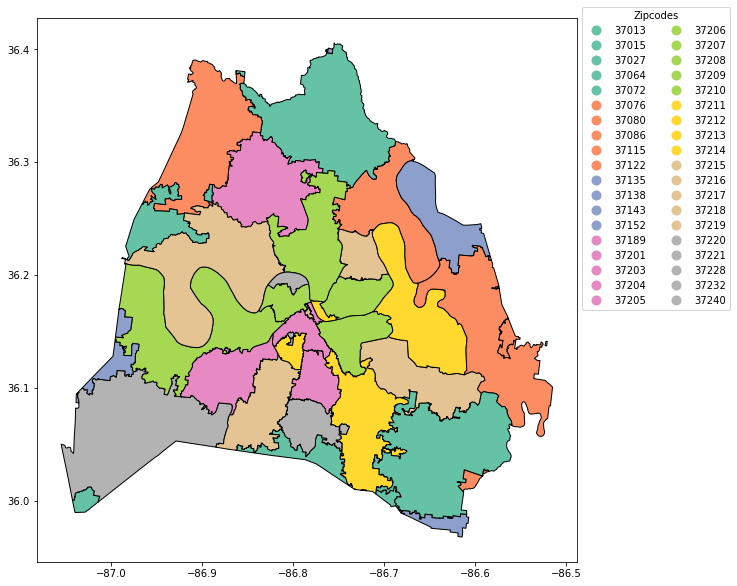

In [10]:
zip_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = zip_kwds, 
              cmap = 'Set2')
plt.show()

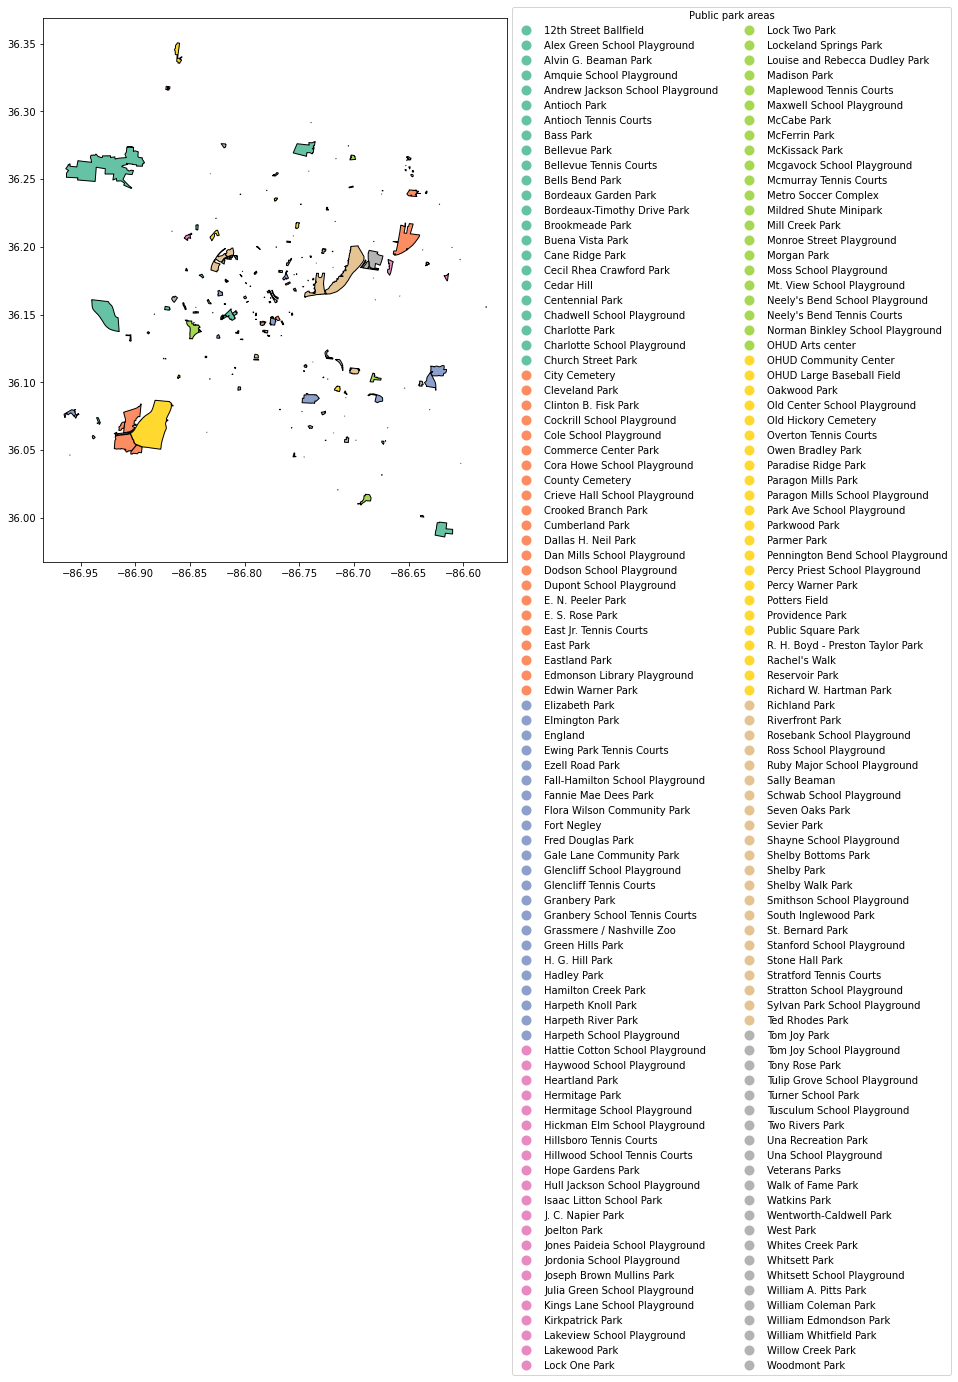

In [11]:
pub_kwds = {'title': 'Public park areas', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

public_parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = pub_kwds, 
              cmap = 'Set2')
plt.show()

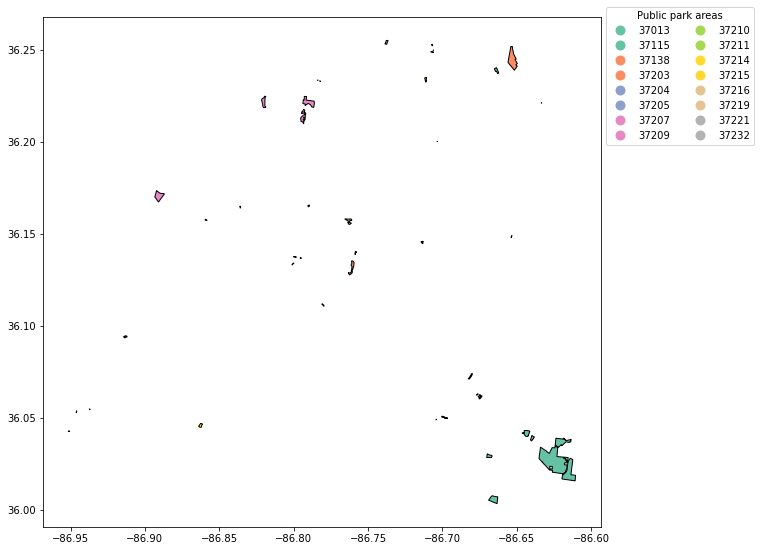

In [12]:
bank_kwds = {'title': 'bank park areas', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

bank_parks.plot(column = 'zipcode', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = pub_kwds, 
              cmap = 'Set2')
plt.show()

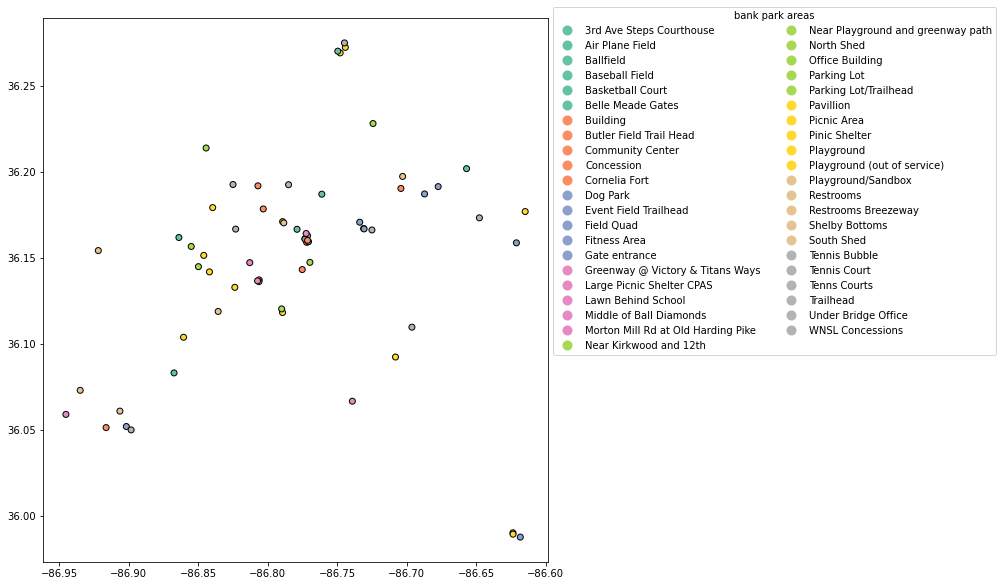

In [13]:
water_kwds = {'title': 'bank park areas', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

public_hydration.plot(column = 'location', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = water_kwds, 
              cmap = 'Set2')
plt.show()

In [14]:
water_geo = gpd.GeoDataFrame(public_hydration, crs = public_parks.crs, geometry = public_hydration['geometry'])

In [15]:
water_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


In [16]:
public_water = gpd.sjoin(water_geo, public_parks, op = 'within')
public_water.head()

name_left                 location dog  \
0                    Beaman Water Fountain                     None   Y   
1       Edwin Nature Center Water Fountain      Restrooms Breezeway   N   
29    Edwin Warner Dog Park Water Fountain                 Dog Park   Y   
30  Edwin Warner Concession Water Fountain         WNSL Concessions   N   
69                  Harpeth River Greenway  Butler Field Trail Head   Y   

   objectid     lon_left ada cnt      lat_left                   feat_type  \
0     45921  36.26250456   Y   1  -86.89425346  Fountain/Bottle filler/ADA   
1     45937  36.06089915   Y   1  -86.90622747           Bottle Filler/ADA   
29    46595  36.05195562   N   1  -86.90162012                    Dog Only   
30    46597  36.04998346   Y   1   -86.8981744                Standard/ADA   
69        0  36.05133033   N   1  -86.91617134  Standard/ADA/Bottle Filler   

                      geometry  index_right     acres            name_right  \
0   POINT (-86.89425 36.26250)            4  2168.792  Alvin G. Beaman Park   
1   POINT (-86.90623 36.06090)            5   1113.12     Edwin Warner Park   
29  POINT (-86.90162 36.05196)            5   1113.12     Edwin Warner Park   
30  POINT (-86.89817 36.04998)            5   1113.12     Edwin Warner Park   
69  POINT (-86.91617 36.05133)            5   1113.12     Edwin Warner Park   

   year_estab                 address     lon_right    lat_right  \
0        1996  5911 Old Hickory Blvd.  -86.91984207  36.26075833   
1        1937            50 Vaughn Rd   -86.9074396  36.05688279   
29       1937            50 Vaughn Rd   -86.9074396  36.05688279   
30       1937            50 Vaughn Rd   -86.9074396  36.05688279   
69       1937            50 Vaughn Rd   -86.9074396  36.05688279   

                                           descriptio public  
0   Beaman Park provides education and awareness p...    yes  
1   Edwin Warner Park is a great, multi-recreation...    yes  
29  Edwin Warner Park is a great, multi-recreation...    yes  
30  Edwin Warner Park is a great, multi-recreation...    yes  
69  Edwin Warner Park is a great, multi-recreation...    yes

In [17]:
public_water['public'].value_counts()

yes    61
Name: public, dtype: int64

In [18]:
public_water = public_water[['name_left', 'location', 'dog', 'ada', 'address', 'lon_left', 'lat_left', 'geometry']]
public_water.head()

name_left                 location dog ada  \
0                    Beaman Water Fountain                     None   Y   Y   
1       Edwin Nature Center Water Fountain      Restrooms Breezeway   N   Y   
29    Edwin Warner Dog Park Water Fountain                 Dog Park   Y   N   
30  Edwin Warner Concession Water Fountain         WNSL Concessions   N   Y   
69                  Harpeth River Greenway  Butler Field Trail Head   Y   N   

                   address     lon_left      lat_left  \
0   5911 Old Hickory Blvd.  36.26250456  -86.89425346   
1             50 Vaughn Rd  36.06089915  -86.90622747   
29            50 Vaughn Rd  36.05195562  -86.90162012   
30            50 Vaughn Rd  36.04998346   -86.8981744   
69            50 Vaughn Rd  36.05133033  -86.91617134   

                      geometry  
0   POINT (-86.89425 36.26250)  
1   POINT (-86.90623 36.06090)  
29  POINT (-86.90162 36.05196)  
30  POINT (-86.89817 36.04998)  
69  POINT (-86.91617 36.05133)

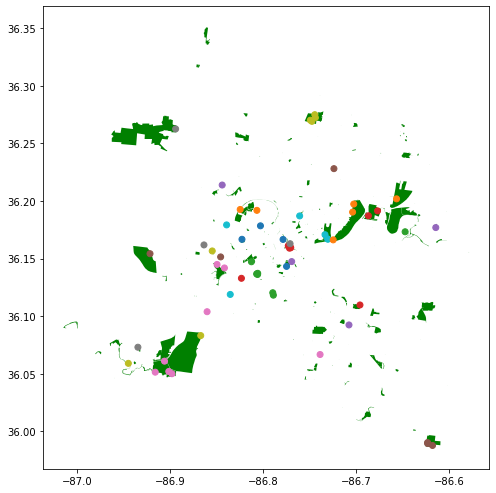

In [19]:
ax = public_parks.plot(figsize = (8,10), color = 'green')
public_water.plot(ax = ax, column = 'address')
plt.show();

In [20]:
nash = [36.174465, -86.767960]
nash

[36.174465, -86.76796]

In [21]:
parks_map = folium.Map(location = nash, zoom_start = 11)
parks_map

In [22]:
i = 0
for row_index, row_values in public_parks.iterrows():
    if i <3:
        print('index is', row_index)
        print('values are:')
        print('')
        print(row_values)
        print('-----------')
        i+=1

index is 0
values are:

acres                                                     69.86
name                                         Harpeth River Park
year_estab                                                 1988
address                                     7820 Coley Davis Rd
lon                                                 -86.9592214
lat                                                 36.07738249
descriptio    Harpeth River State Park has much historical a...
geometry      (POLYGON ((-86.95546524763979 36.0793014557985...
public                                                      yes
Name: 0, dtype: object
-----------
index is 1
values are:

acres                                                      9.88
name                                         Harpeth Knoll Park
year_estab                                                 1972
address                                 708 Goodpasture Terrace
lon                                                -86.93815537
lat                  

In [23]:
parks_map = folium.Map(location = nash, zoom_start = 11)

folium.GeoJson(public_parks).add_to(parks_map)

for row_index, row_values in public_parks.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon = folium.Icon(color='blue', icon = 'fa-tint', prefix= 'fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    
    marker.add_to(parks_map)
parks_map.save('../maps/parks_map.html')

parks_map

In [24]:
parks_cluster_map = folium.Map(location = nash, zoom_start = 11)

marker_cluster = MarkerCluster().add_to(parks_cluster_map)

folium.GeoJson(public_parks).add_to(parks_map)

for row_index, row_values in public_parks.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon = folium.Icon(color='blue', icon = 'fa-tint', prefix= 'fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(marker_cluster)
    

parks_cluster_map.save('../maps/parks_cluster_map.html')
parks_cluster_map